## Group Name: SSL

# **Introduction**
#### **Welcome** to our final project report! We will be sharing our discoveries on identifying the best neighborhood in Pittsburgh with you. The goal of this project was to identify different data sets that exemplify “bestness.” But what does “bestness” really mean when determining the best neighborhood in Pittsburgh?

#### **Our approach** began by looking at Pittsburgh as a prospective resident looking to establish themselves in Pittsburgh. We had to ask ourselves, if we wanted to live in Pittsburgh, what would be the key factors that would help us decide where exactly in the city to move? We decided that **the most important factors** are **safety, overall quality, and greenspaces.**

#### **The metrics** we chose are:
#### 1. **Crime Rates**
#### 2. **Non-Traffic Citations**
#### 3. **Parks**

#### **Crime rates** are key to determining the “bestness” of a neighborhood as they are a direct connection to overall safety. **We came up with this metric because** safety ensures a secure environment for residents to live in. This promotes a sense of security, stability, and overall satisfaction in the community.

#### **Non-traffic citations** are another key to determining the “bestness” of a neighborhood, as they provide an understanding of the overall quality of life and areas for improvement. **We came up with this metric because** this gives a broader overview of the quality of each neighborhood. Non-traffic citations represent the quality of a neighborhood's adherence to rules, quality of life, community engagement, and safety. 

#### **Parks** are key to determining the “bestness” of a neighborhood as they allow residents a direct connection to greenspaces and their community. **We came up with this metric because** we believe that among the hustle and bustle of a major urban city like Pittsburgh, it is necessary for all residents to have access to greenspaces. This promotes more time outside, a space for kids to play, and direct community engagement.

#### **Other metrics** we explored are:
#### 1. **Air Quality**
#### 2. **Grocery Stores**
#### 3. **Restaurants**

#### **These other metrics** were not chosen as they did not present the most clear or complete explanation of “bestness” within a neighborhood. These other metrics are great to look at and surely add to the quality of a neighborhood. However, we ultimately decided that the most important metrics were represented by safety, overall quality, and greenspaces. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
%matplotlib inline

### Anaylzing the metrics

The three metric we are combing to find the safest neighborhood are non-traffic citations, incident reports and parks.

<Axes: title={'center': 'Bottom 10 Citation Counts by Neighborhood'}, xlabel='Neighborhood'>

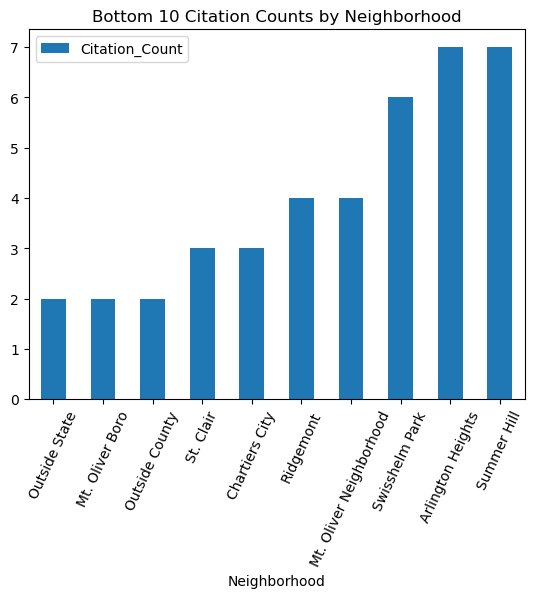

In [ ]:
# non-traffic citations
citation_df = pd.read_csv("nontraffic_citations.csv")
citation_counts = citation_df['NEIGHBORHOOD'].value_counts()
citation_counts_df = citation_counts.reset_index()
citation_counts_df.columns = ['Neighborhood', 'Citation_Count']

bot_10_citation = citation_counts_df.tail(10)
bot_10_citation = bot_10_citation.sort_values(by='Citation_Count', ascending=True)
bot_10_citation.plot.bar(x='Neighborhood', y='Citation_Count', rot=65, title="Bottom 10 Citation Counts by Neighborhood")


<Axes: title={'center': 'Bottom 10 Incident Counts by Neighborhood'}, xlabel='Neighborhood'>

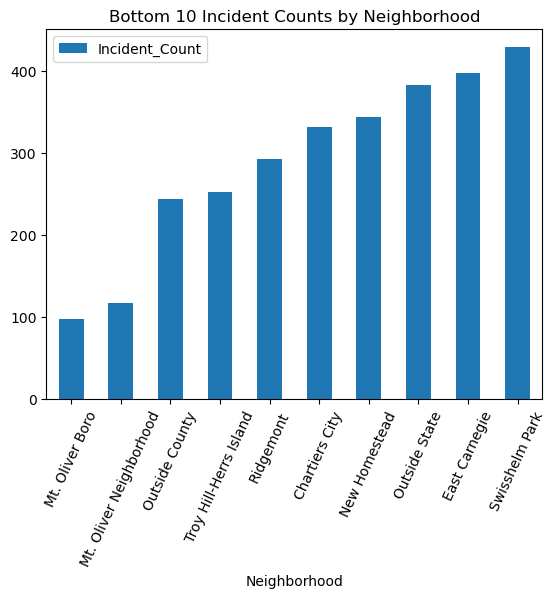

In [ ]:
# police incidents
crime = pd.read_csv("crime_rates.csv")
neighborhood = crime['INCIDENTNEIGHBORHOOD'].value_counts()
crime_counts_df = neighborhood.reset_index()
crime_counts_df.columns = ['Neighborhood','Incident_Count']

bot_10_incident = crime_counts_df.tail(10)
bot_10_incident = bot_10_incident.sort_values(by='Incident_Count', ascending=True)
bot_10_incident.plot.bar(x='Neighborhood', y='Incident_Count', rot=65, title="Bottom 10 Incident Counts by Neighborhood")


<Axes: title={'center': 'Top 10 Park Counts by Neighborhood'}, xlabel='Neighborhood'>

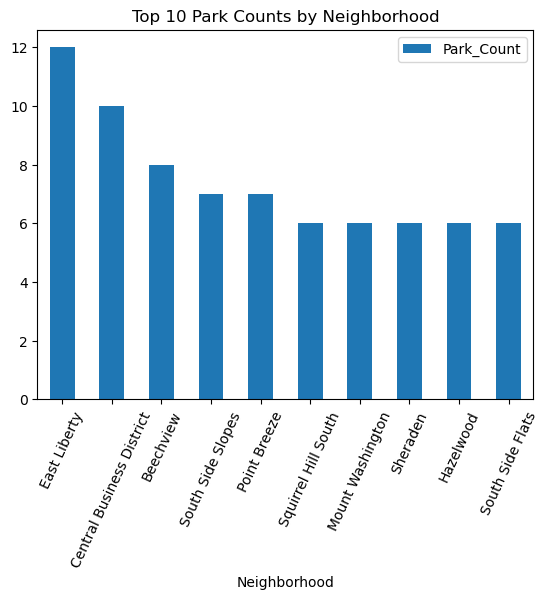

In [ ]:
# parks
park_df = pd.read_csv("parks.csv")
park_count = park_df['neighborhood'].value_counts()
park_count_df = park_count.reset_index()
park_count_df.columns = ['Neighborhood', 'Park_Count']


top_10_park = park_count_df.head(10)
top_10_park = top_10_park.sort_values(by='Park_Count', ascending=False)
top_10_park.plot.bar(x='Neighborhood', y='Park_Count', rot=65, title="Top 10 Park Counts by Neighborhood")

### Normalizing the Data

In the section below, we normalized the data, to have a value between 0 and 1. This brings all the different data to a common scale, since they all had a different range of values.

In [ ]:
# merge data frames into one
merge_dfs = pd.merge(citation_counts_df, crime_counts_df, on='Neighborhood')
metrics_df = pd.merge(merge_dfs,park_count_df, on='Neighborhood')

In [ ]:
# normalize data
citations = metrics_df['Citation_Count']
metrics_df['Citation_Count'] = (citations - citations.min()) / (citations.max() - citations.min())

incidents = metrics_df['Incident_Count']
metrics_df['Incident_Count'] = (incidents - incidents.min()) / (incidents.max() - incidents.min())

parks = metrics_df['Park_Count']
metrics_df['Park_Count'] = (parks - parks.min()) / (parks.max() - parks.min())

print(metrics_df)

                 Neighborhood  Citation_Count  Incident_Count  Park_Count
0            South Side Flats        1.000000        0.963581    0.454545
1   Central Business District        0.586126        1.000000    0.818182
2             Central Oakland        0.192828        0.251250    0.272727
3                 North Shore        0.167549        0.174043    0.181818
4                     Carrick        0.128748        0.596337    0.181818
..                        ...             ...             ...         ...
67                    Oakwood        0.000882        0.014210    0.000000
68              Regent Square        0.000882        0.011157    0.000000
69                       Hays        0.000882        0.011263    0.000000
70              New Homestead        0.000588        0.000000    0.000000
71             Swisshelm Park        0.000000        0.004473    0.181818

[72 rows x 4 columns]


### Ranking the Data

After normalzing the data, we ranked the neighborhoods for each metric. The higher a neighborhoods citation and incident number, the higher they got ranked. For parks, it was the opposite, the higher the number, the lower the rank.

After the data has been ranked, we took the average of each neighborhood's ranks. The idea behind this is the neighborhood with the lowest ranking average would be considerd the best neighborhood.

In [ ]:
# Rank neighborhoods, citations and incidents lower is better, parks higher is better
metrics_df['Citation_Rank'] = metrics_df['Citation_Count'].rank(ascending=True)
metrics_df['Incident_Rank'] = metrics_df['Incident_Count'].rank(ascending=True)
metrics_df['Park_Rank'] = metrics_df['Park_Count'].rank(ascending=False)
print(metrics_df)


                 Neighborhood  Citation_Count  Incident_Count  Park_Count  \
0            South Side Flats        1.000000        0.963581    0.454545   
1   Central Business District        0.586126        1.000000    0.818182   
2             Central Oakland        0.192828        0.251250    0.272727   
3                 North Shore        0.167549        0.174043    0.181818   
4                     Carrick        0.128748        0.596337    0.181818   
..                        ...             ...             ...         ...   
67                    Oakwood        0.000882        0.014210    0.000000   
68              Regent Square        0.000882        0.011157    0.000000   
69                       Hays        0.000882        0.011263    0.000000   
70              New Homestead        0.000588        0.000000    0.000000   
71             Swisshelm Park        0.000000        0.004473    0.181818   

    Citation_Rank  Incident_Rank  Park_Rank   Avg_rank  
0            72.0 

                 Neighborhood   Avg_rank
0            South Side Flats  50.333333
1   Central Business District  48.333333
2             Central Oakland  46.500000
3                 North Shore  45.666667
4                     Carrick  54.333333
..                        ...        ...
67                    Oakwood  23.666667
68              Regent Square  23.000000
69                       Hays  23.333333
70              New Homestead  21.333333
71             Swisshelm Park   9.666667

[72 rows x 2 columns]


<Axes: title={'center': 'Lowest 10 Average Ranks'}, xlabel='Neighborhood'>

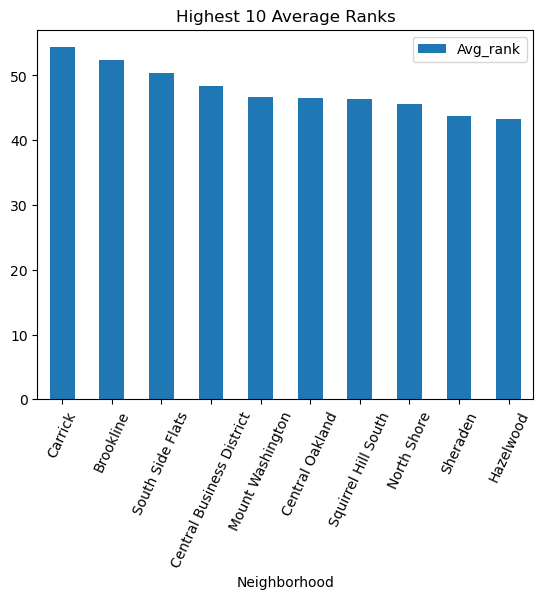

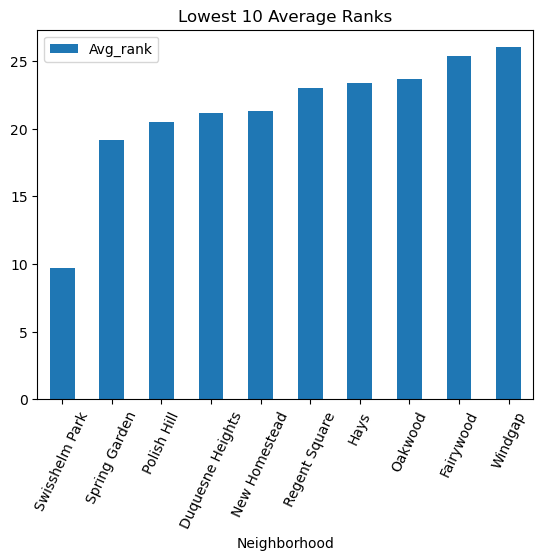

In [ ]:
#avg ranks
metrics_df["Avg_rank"] = metrics_df[['Citation_Rank', 'Incident_Rank', 'Park_Rank']].mean(axis=1)
print(metrics_df[['Neighborhood', 'Avg_rank']])

top_10_rank = metrics_df.head(10)
top_10_rank = top_10_rank.sort_values(by='Avg_rank', ascending=False)
top_10_rank.plot.bar(x='Neighborhood', y='Avg_rank', rot=65, title="Highest 10 Average Ranks")

bot_10_rank = metrics_df.tail(10)
bot_10_rank = bot_10_rank.sort_values(by='Avg_rank', ascending=True)
bot_10_rank.plot.bar(x='Neighborhood', y='Avg_rank', rot=65, title="Lowest 10 Average Ranks")


In [ ]:
best_neighborhood = metrics_df.sort_values(by='Avg_rank')
print(best_neighborhood[['Neighborhood', 'Avg_rank']])

           Neighborhood   Avg_rank
71       Swisshelm Park   9.666667
66        Spring Garden  19.166667
63          Polish Hill  20.500000
53  Upper Lawrenceville  20.666667
51             Westwood  21.000000
..                  ...        ...
4               Carrick  54.333333
12       Homewood North  54.500000
22           East Hills  55.000000
13        North Oakland  57.333333
11       Homewood South  62.000000

[72 rows x 2 columns]


In [ ]:
top_10_neighborhoods = []
cnt = 1
print("Top 10 Neighborhoods")
for i in best_neighborhood['Neighborhood']:
    if cnt == 11:
        break
    print(cnt, ". ", i, sep="")
    cnt += 1

Top 10 Neighborhoods
1. Swisshelm Park
2. Spring Garden
3. Polish Hill
4. Upper Lawrenceville
5. Westwood
6. Duquesne Heights
7. New Homestead
8. Troy Hill
9. Regent Square
10. Hays


## Our Reflections

### **Crime Reflection**

#### **In conclusion,** the DF presents us with the best neighborhood based on crime, which is, "Mt. Oliver Boro." Crime is super important when deciding where to live because it ensures safety and security. Not only these factors, but it increases a person's pverall quality of life when liviing in a safe neighborhood. All residents in Pittsburgh deserve access to a safe environment. No matter if they are natives, visiting, or new to the city. My favorite neighborhood has to be Mt. Oliver Boro as it is my top neighborhood in my DF and leads my data-driven argument. I hope this project gives all who view it, a better insight into different neighborhoods in Pittsburgh. 

### Non-Traffic Citations Reflection
The analysis for Non-Traffic Citations reflects on Outside State, Mt. Oliver Boro, and Outside County being the best neighborhoods since they all tied with 2 citations given. I believe this is an important metric for finding the best neighborhood because safety is very important for a neighborhood. I honeslty never heard of any of these neighborhoods so I can not have an opinion on them. My personal favorite neighborhood is probably Shady Side, because it feels more of a town than a city.

If I were to take this project further, I would want to add in more factors for this metric. For example, the population in the neighborhoods, as well as weights to the citations given. With this anaylsis, I am just getting the number of citations given per neighborhood. I do not think assault and noise complaints should be weighted the same, but finding those weights would be difficult, they can also be subjective. This project helped me learn about analysing data, it was useful and interesting to use real data to make an argument. 

### Parks Reflection
With the idea that the more parks the better, the parks data set reflects East Liberty as being the best neighborhood in Pittsburgh. I come from an area with many parks and I have experienced the benefits of them. They make a great place to go and hangout with friends, see some nature, or meet new people. I believe that from the perspective of a prospective resident, the number of nearby parks is definitely something I would take into consideration when choosing where to live.

My personal favorite neighborhood is Shadyside because of the good shopping and enjoyable ambiance, and East Liberty is close by, so maybe if I was more familiar with the area that could be my favorite neighborhood.